In [44]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [45]:
def zobrazit_obl(matice, x0, xn, t0, tn):
    obrazek = np.rot90(deepcopy(matice))
    plt.figure(figsize=(8,8))
    plt.imshow(obrazek, cmap='jet',extent=[x0, xn, t0, tn] )
    plt.colorbar(shrink = 0.5)
    plt.show()

## Pocatecni podminky a vytvoreni mrizky

In [46]:
x0, xn, h = 0., 4. , 0.1
t0, tn, tau = 0., 4. , 0.01
parametry = [x0, xn, t0, tn]

sigma = 0.5 * tau / h**2

b = 4.
u_t0 = 1
u_bt = 1/ (1 + b**2)
u_x = [1/ (1 + xi**2) for xi in np.arange(x0, xn+h, h)]

x = np.arange(x0, xn+h, h)
t = np.arange(t0, tn+tau, tau )

len_x,len_t = len(x), len(t)

u = np.zeros((len_x, len_t))
u[:, 0] = u_x
u[0, :] = u_t0
u[-1, :] = u_bt

In [47]:
u.shape

(41, 401)

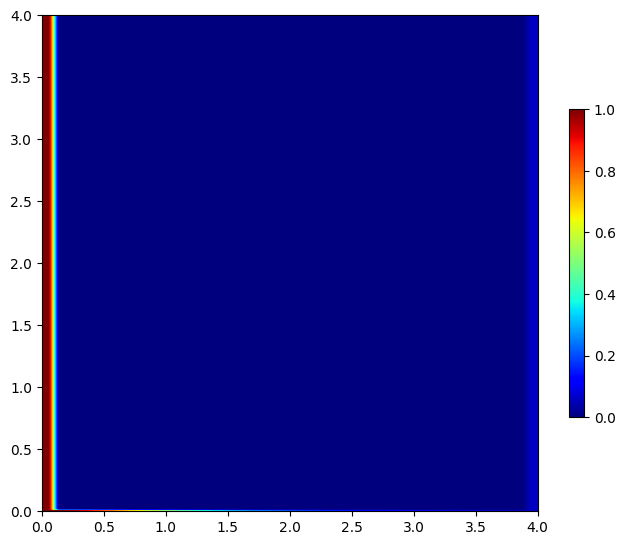

In [48]:
zobrazit_obl(u, *parametry)

## Crank-Nicolsonova metoda

In [49]:
sub_d = [-sigma] * (len_x-1)
hl_d = [2. + 2. * sigma] * len_x

A = np.diag(hl_d) + np.diag(sub_d, -1) + np.diag(sub_d, 1)
A[0, :] = A[-1, :] = 0
A[0, 0] = A[-1, -1] = 1

In [51]:
for k in range(len_t - 1):
    g = np.zeros(len_x)
    for i in range(1, len_x - 1):
        g[i] = (sigma * (u[i-1, k] + u[i+1, k]) + 
                (2. - 2.*sigma)*u[i, k] + 
                tau * (np.sin(t[k]) + np.sin(t[k + 1])))
    g[0] = 1.
    g[-1] = 1. / (1. + b**2)
    
    u[:, k + 1] = np.linalg.solve(A, g)

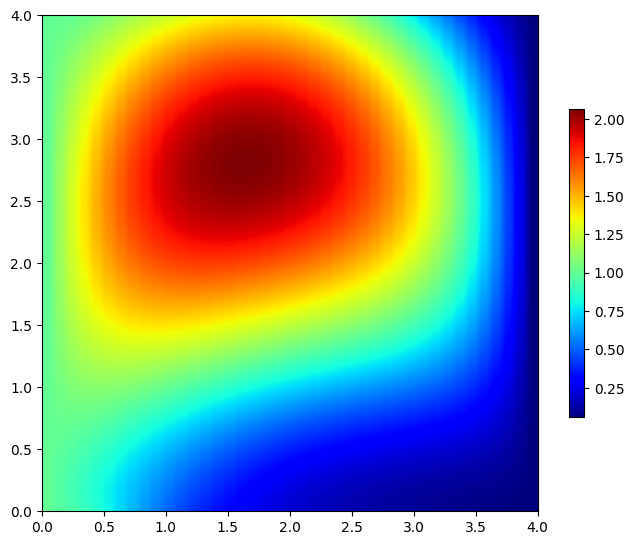

In [52]:
zobrazit_obl(u, *parametry)